In [1]:
from lifelines import CoxPHFitter
import pandas as pd

In [ ]:
pip install lifelines 

In [2]:
df=pd.read_csv('E:/中山三院/CKD/usa/MDRD_NIDDK_DEVELOPEMENT_output.csv',encoding='utf-8',header=None)

In [6]:
df2=pd.read_csv('E:/中山三院/CKD/usa/AASK_divelement_data_output.csv',encoding='utf-8',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9
0,0,31.174142,22,272,99.0,40,0,1.5,40,0
1,0,31.340000,26,179,100.7,48,1,1.4,22,0
2,0,27.290000,24,170,94.7,57,0,2.0,35,0
3,0,22.640000,41,171,114.0,62,0,2.8,27,1
4,1,27.760000,30,160,70.0,69,0,1.7,35,0
...,...,...,...,...,...,...,...,...,...,...
707,0,19.990000,28,222,82.0,44,1,2.2,27,0
708,0,19.850000,40,143,85.3,44,1,3.4,32,0
709,0,20.600000,34,236,92.3,36,1,2.1,32,0
710,0,25.320000,41,161,99.7,68,1,2.0,36,0


In [ ]:
f=['mbgfr','al_mos_xd Month to Dialysis, Death or ADMDT','al_evt_xd ESRD or death (0/1)']
f=set(f)
feats = list(f - set([prot]))

In [3]:
for i in range(len(df)):
    if df['BP'][i] == 'L':
        df['BP'][i] = 1 
    else:
        df['BP'][i] = 0 
        

<ipython-input-3-0692d25169ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP'][i] = 1
<ipython-input-3-0692d25169ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP'][i] = 0


In [4]:
df = df.drop(columns=['gevnt_dt', 'dial_dt','death_alldt','dial_dt','al_mos_xdp','dial_dt','DEATH_DT','al_evt_dESRD alone (0/1)','al_evt_xdp Doubling SCR,ESRD or death (0/1)','al_evt_xdp Doubling SCR,ESRD or death (0/1)','al_evt_dp Doubling SCR,ESRD (0/1)','GFR'])

In [8]:
# for index, row in df.iteritems():
#     if df[index].isnull().sum():
#         means = df[index].sum()/len(df[index])
#         for i in range(len(df[index])):
#             if df[index][i] is None:
#                 df[index][i] = means
df

,HT,MAP,SYS,DIA,UUN,USOD,BP,UCRE,BMI,BSA,WBC,mbgfr,al_evt_xd ESRD or death (0/1),"al_mos_xd Month to Dialysis, Death or ADMDT",MAR_STAT（婚姻状态）
0,177.80,88.000000,109,78,7.34140,2.514820,1,2.210940,27.549132,2.080271,6.9,62.070632,0,128.919918,2
2,170.18,116.666667,136,107,9.17400,5.434900,1,1.959900,25.842653,1.865147,7.4,33.112857,0,125.404517,3
3,175.26,104.333333,143,85,3.64980,1.780660,0,1.333520,26.433679,1.973932,5.8,27.645282,1,71.425051,4
4,165.10,104.333333,135,89,5.97300,3.663440,0,1.201840,29.787159,1.894977,5.4,52.326590,0,129.084189,5
5,165.10,100.000000,151,85,4.76740,3.171700,1,0.996820,28.955115,1.865196,3.3,56.513624,0,112.098563,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,177.20,96.666667,126,82,7.15792,5.452104,1,1.329328,24.522418,1.936592,6.8,23.556718,1,60.681725,2
1089,161.80,122.000000,162,102,8.06740,4.616560,0,1.127120,25.592798,1.724615,7.4,38.250791,1,73.593429,2
1090,151.20,94.666667,130,77,5.93340,1.454520,0,1.002540,22.308306,1.452977,7.5,63.977040,0,106.151951,4
1091,167.90,97.666667,141,76,11.59400,6.417000,0,2.445900,37.601440,2.164860,11.0,26.439037,1,69.223819,1


In [4]:
df = df.dropna()

In [55]:
df.corr()

,HT,MAP,SYS,DIA,UUN,USOD,UCRE,BMI,BSA,WBC,mbgfr,al_evt_xd ESRD or death (0/1),"al_mos_xd Month to Dialysis, Death or ADMDT",MAR_STAT（婚姻状态）
HT,1.000000,0.019026,-0.020334,0.048560,0.286366,0.198404,0.493026,-0.116490,0.695033,-0.060138,0.088441,-0.033482,0.080125,-0.167601
MAP,0.019026,1.000000,0.906845,0.936611,-0.040024,0.024984,-0.002869,0.062315,0.064023,0.072844,-0.050608,0.016948,-0.066740,-0.065669
SYS,-0.020334,0.906845,1.000000,0.702204,-0.038350,0.008615,-0.033400,0.035155,0.011053,0.079998,-0.060138,0.022661,-0.068681,-0.032273
DIA,0.048560,0.936611,0.702204,1.000000,-0.037083,0.034753,0.021808,0.075853,0.098512,0.055172,-0.034949,0.009047,-0.056010,-0.085007
UUN,0.286366,-0.040024,-0.038350,-0.037083,1.000000,0.512721,0.785735,0.251076,0.414629,-0.009906,0.184234,-0.022543,0.125688,-0.013457
USOD,0.198404,0.024984,0.008615,0.034753,0.512721,1.000000,0.505720,0.206946,0.304442,-0.024271,0.061792,-0.007006,0.055406,-0.046865
UCRE,0.493026,-0.002869,-0.033400,0.021808,0.785735,0.505720,1.000000,0.227573,0.560186,-0.049600,0.208701,-0.030344,0.097130,-0.099497
BMI,-0.116490,0.062315,0.035155,0.075853,0.251076,0.206946,0.227573,1.000000,0.621721,0.096423,0.034360,0.075421,-0.092596,-0.007094
BSA,0.695033,0.064023,0.011053,0.098512,0.414629,0.304442,0.560186,0.621721,1.000000,0.029738,0.103305,0.024487,0.002358,-0.142956
WBC,-0.060138,0.072844,0.079998,0.055172,-0.009906,-0.024271,-0.049600,0.096423,0.029738,1.000000,-0.113630,0.055943,-0.094987,-0.013260


In [49]:

def regularit(df):
    df = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    
    for c in columns:
        if c!=8 or 9:
            d = df[c]
            MAX = d.max()
            MIN = d.min()
            df1[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return  df1


In [66]:
df1= regularit(df)


In [112]:
df1['al_mos_xd Month to Dialysis, Death or ADMDT']=df['al_mos_xd Month to Dialysis, Death or ADMDT']

In [113]:
df1

,HT,MAP,SYS,DIA,UUN,USOD,BP,UCRE,BMI,BSA,WBC,mbgfr,al_evt_xd ESRD or death (0/1),MAR_STAT（婚姻状态）,"al_mos_xd Month to Dialysis, Death or ADMDT"
0,0.636364,0.110092,0.074830,0.203883,0.250225,0.146038,1.0,0.535631,0.257432,0.459736,0.343284,0.586776,0.0,0.4,128.919918
2,0.500000,0.373089,0.258503,0.485437,0.318386,0.330232,1.0,0.471391,0.213395,0.319202,0.368159,0.179201,0.0,0.6,125.404517
3,0.590909,0.259939,0.306122,0.271845,0.112920,0.099728,0.0,0.311101,0.228647,0.390268,0.288557,0.102246,1.0,0.8,71.425051
4,0.409091,0.259939,0.251701,0.310680,0.199329,0.218491,0.0,0.277404,0.315187,0.338689,0.268657,0.449630,0.0,1.0,129.084189
5,0.409091,0.220183,0.360544,0.271845,0.154488,0.187473,1.0,0.224940,0.293715,0.319234,0.164179,0.508562,0.0,0.4,112.098563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,0.625626,0.189602,0.190476,0.242718,0.243401,0.331318,1.0,0.310028,0.179325,0.365875,0.338308,0.044700,1.0,0.4,60.681725
1089,0.350036,0.422018,0.435374,0.436893,0.277228,0.278613,0.0,0.258283,0.206947,0.227396,0.368159,0.251516,1.0,0.4,73.593429
1090,0.160344,0.171254,0.217687,0.194175,0.197856,0.079156,0.0,0.226404,0.122188,0.049943,0.373134,0.613608,0.0,0.8,106.151951
1091,0.459198,0.198777,0.292517,0.184466,0.408395,0.392182,0.0,0.595757,0.516841,0.514995,0.547264,0.085268,1.0,0.2,69.223819


In [67]:
cph = CoxPHFitter()
cph.fit(df1, duration_col=8, event_col=9)

cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 498 total observations, 274 right-censored observations>
             duration col = '8'
                event col = '9'
      baseline estimation = breslow
   number of observations = 498
number of events observed = 224
   partial log-likelihood = -1231.88
         time fit was run = 2021-07-17 09:42:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
0           0.31       1.36       0.15             0.02             0.60                 1.02                 1.82
1          -0.01       0.99       0.01            -0.04             0.01                 0.96                 1.01
2           0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
3           0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
4          -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
5          -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
6           0.40       1.49       0.16             0.09             0.71                 1.09                 2.04
7           0.90       2.45       0.12             0.66             1.13                 1.94                 3.10

              z      p   -log2(p)
covariate                        
0          2.09   0.04       4.77
1         -1.07   0.28       1.81
2          1.07   0.29       1.80
3          2.11   0.04       4.83
4         -0.24   0.81       0.30
5         -0.15   0.88       0.18
6          2.51   0.01       6.38
7          7.46 <0.005      43.39
---
Concordance = 0.72
Partial AIC = 2479.76
log-likelihood ratio test = 128.75 on 8 df
-log2(p) of ll-ratio test = 77.36

In [7]:
df1=df[['mbgfr','al_mos_xd Month to Dialysis, Death or ADMDT','al_evt_xd ESRD or death (0/1)']]
df1["MAP-SYS-DIA"]=(df['SYS']*df['DIA']*df['MAP'])**8

df1["HT-BMI-BSA"]=df["BMI"]*df["BSA"]*df['HT']
df1['UCRE-UUN']=(df["UCRE"]*df['UUN'])**32

<ipython-input-7-d5cd5f864ee5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["MAP-SYS-DIA"]=(df['SYS']*df['DIA']*df['MAP'])**8
<ipython-input-7-d5cd5f864ee5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["HT-BMI-BSA"]=df["BMI"]*df["BSA"]*df['HT']
<ipython-input-7-d5cd5f864ee5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [108]:
cph1 = CoxPHFitter()
cph1.fit(df1, duration_col='al_mos_xd Month to Dialysis, Death or ADMDT', event_col='al_evt_xd ESRD or death (0/1)')

cph1.print_summary() 

<lifelines.CoxPHFitter: fitted with 639 total observations, 457 right-censored observations>
             duration col = 'al_mos_xd Month to Dialysis, Death or ADMDT'
                event col = 'al_evt_xd ESRD or death (0/1)'
      baseline estimation = breslow
   number of observations = 639
number of events observed = 182
   partial log-likelihood = -1070.34
         time fit was run = 2021-06-18 04:42:23 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
mbgfr        -0.05       0.95       0.01            -0.07            -0.04                 0.94                 0.96
MAP-SYS-DIA  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
HT-BMI-BSA    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
UCRE-UUN      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                z      p   -log2(p)
covariate                          
mbgfr       -9.09 <0.005      63.13
MAP-SYS-DIA -1.27   0.20       2.30
HT-BMI-BSA   2.22   0.03       5.24
UCRE-UUN     0.97   0.33       1.58
---
Concordance = 0.70
Partial AIC = 2148.67
log-likelihood ratio test = 83.49 on 4 df
-log2(p) of ll-ratio test = 54.81

In [116]:
df1.corr()

,HT,MAP,SYS,DIA,UUN,USOD,BP,UCRE,BMI,BSA,WBC,mbgfr,al_evt_xd ESRD or death (0/1),MAR_STAT（婚姻状态）,"al_mos_xd Month to Dialysis, Death or ADMDT"
HT,1.000000,0.019026,-0.020334,0.048560,0.286366,0.198404,0.033531,0.493026,-0.116490,0.695033,-0.060138,0.088441,-0.033482,-0.167601,0.080125
MAP,0.019026,1.000000,0.906845,0.936611,-0.040024,0.024984,0.055224,-0.002869,0.062315,0.064023,0.072844,-0.050608,0.016948,-0.065669,-0.066740
SYS,-0.020334,0.906845,1.000000,0.702204,-0.038350,0.008615,0.047825,-0.033400,0.035155,0.011053,0.079998,-0.060138,0.022661,-0.032273,-0.068681
DIA,0.048560,0.936611,0.702204,1.000000,-0.037083,0.034753,0.054863,0.021808,0.075853,0.098512,0.055172,-0.034949,0.009047,-0.085007,-0.056010
UUN,0.286366,-0.040024,-0.038350,-0.037083,1.000000,0.512721,0.034168,0.785735,0.251076,0.414629,-0.009906,0.184234,-0.022543,-0.013457,0.125688
USOD,0.198404,0.024984,0.008615,0.034753,0.512721,1.000000,0.052473,0.505720,0.206946,0.304442,-0.024271,0.061792,-0.007006,-0.046865,0.055406
BP,0.033531,0.055224,0.047825,0.054863,0.034168,0.052473,1.000000,0.011889,-0.026180,0.004750,0.021997,-0.018488,-0.011873,-0.014563,0.051039
UCRE,0.493026,-0.002869,-0.033400,0.021808,0.785735,0.505720,0.011889,1.000000,0.227573,0.560186,-0.049600,0.208701,-0.030344,-0.099497,0.097130
BMI,-0.116490,0.062315,0.035155,0.075853,0.251076,0.206946,-0.026180,0.227573,1.000000,0.621721,0.096423,0.034360,0.075421,-0.007094,-0.092596
BSA,0.695033,0.064023,0.011053,0.098512,0.414629,0.304442,0.004750,0.560186,0.621721,1.000000,0.029738,0.103305,0.024487,-0.142956,0.002358


In [117]:
df5=df1[['mbgfr','al_mos_xd Month to Dialysis, Death or ADMDT','al_evt_xd ESRD or death (0/1)']]
df5["MAP-SYS-DIA"]=(df1['SYS']*df1['DIA']*df1['MAP'])**8

df5["HT-BMI-BSA"]=df1["BMI"]*df1["BSA"]*df1['HT']
df5['UCRE-UUN']=(df1["UCRE"]*df1['UUN'])**20

<ipython-input-117-fe7885d06abd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["MAP-SYS-DIA"]=(df1['SYS']*df1['DIA']*df1['MAP'])**8
<ipython-input-117-fe7885d06abd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["HT-BMI-BSA"]=df1["BMI"]*df1["BSA"]*df1['HT']
<ipython-input-117-fe7885d06abd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [118]:
cph5 = CoxPHFitter()
cph5.fit(df5, duration_col='al_mos_xd Month to Dialysis, Death or ADMDT', event_col='al_evt_xd ESRD or death (0/1)')

cph5.print_summary() 

F:\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:1090: ConvergenceWarning: Column(s) ['UCRE-UUN'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 639 total observations, 457 right-censored observations>
             duration col = 'al_mos_xd Month to Dialysis, Death or ADMDT'
                event col = 'al_evt_xd ESRD or death (0/1)'
      baseline estimation = breslow
   number of observations = 639
number of events observed = 182
   partial log-likelihood = -1071.20
         time fit was run = 2021-06-18 04:48:07 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
mbgfr        -3.80       0.02       0.42            -4.63            -2.98                 0.01                 0.05
MAP-SYS-DIA -17.12       0.00      17.03           -50.49            16.25                 0.00             1.14e+07
HT-BMI-BSA    1.37       3.95       0.85            -0.29             3.04                 0.75                20.96
UCRE-UUN      4.48      87.93       5.70            -6.70            15.65                 0.00             6.29e+06

                z      p   -log2(p)
covariate                          
mbgfr       -9.05 <0.005      62.64
MAP-SYS-DIA -1.01   0.31       1.67
HT-BMI-BSA   1.61   0.11       3.23
UCRE-UUN     0.78   0.43       1.21
---
Concordance = 0.69
Partial AIC = 2150.41
log-likelihood ratio test = 81.76 on 4 df
-log2(p) of ll-ratio test = 53.59

In [28]:
df2=df[['HT','DIA','UUN','al_mos_xd Month to Dialysis, Death or ADMDT','al_evt_xd ESRD or death (0/1)']]

In [29]:
df2

,HT,DIA,UUN,"al_mos_xd Month to Dialysis, Death or ADMDT",al_evt_xd ESRD or death (0/1)
0,177.80,78,7.34140,128.919918,0
2,170.18,107,9.17400,125.404517,0
3,175.26,85,3.64980,71.425051,1
4,165.10,89,5.97300,129.084189,0
5,165.10,85,4.76740,112.098563,0
...,...,...,...,...,...
1088,177.20,82,7.15792,60.681725,1
1089,161.80,102,8.06740,73.593429,1
1090,151.20,77,5.93340,106.151951,0
1091,167.90,76,11.59400,69.223819,1


In [16]:
cph2 = CoxPHFitter()
cph2.fit(df2, duration_col='al_mos_xd Month to Dialysis, Death or ADMDT', event_col='al_evt_xd ESRD or death (0/1)')

cph2.print_summary() 

<lifelines.CoxPHFitter: fitted with 639 total observations, 457 right-censored observations>
             duration col = 'al_mos_xd Month to Dialysis, Death or ADMDT'
                event col = 'al_evt_xd ESRD or death (0/1)'
      baseline estimation = breslow
   number of observations = 639
number of events observed = 182
   partial log-likelihood = -952.74
         time fit was run = 2021-06-16 02:04:09 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
HT          -0.02       0.98       0.01            -0.04            -0.01                 0.96                 0.99
UUN          0.03       1.03       0.02            -0.01             0.08                 0.99                 1.08
GFR         -0.05       0.95       0.01            -0.06            -0.04                 0.94                 0.96
al_mos_xdp  -0.04       0.96       0.00            -0.04            -0.03                 0.96                 0.97

                z      p   -log2(p)
covariate                          
HT          -2.83 <0.005       7.72
UUN          1.59   0.11       3.16
GFR         -7.82 <0.005      47.43
al_mos_xdp -17.27 <0.005     219.67
---
Concordance = 0.89
Partial AIC = 1913.48
log-likelihood ratio test = 318.68 on 4 df
-log2(p) of ll-ratio test = 222.55

# 威布尔 AFT 模型

In [57]:
from lifelines import WeibullAFTFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()




In [59]:
aft = WeibullAFTFitter()
aft.fit(df, duration_col='al_mos_xd Month to Dialysis, Death or ADMDT', event_col='al_evt_xd ESRD or death (0/1)')

aft.print_summary()  # access the results using aft.summary

<lifelines.WeibullAFTFitter: fitted with 639 total observations, 457 right-censored observations>
             duration col = 'al_mos_xd Month to Dialysis, Death or ADMDT'
                event col = 'al_evt_xd ESRD or death (0/1)'
   number of observations = 639
number of events observed = 182
           log-likelihood = -985.04
         time fit was run = 2021-06-10 00:32:17 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                              
lambda_ BMI             -0.02       0.98       0.01            -0.05             0.00                 0.95                 1.00
        BP               0.05       1.05       0.03            -0.01             0.11                 0.99                 1.12
        BSA              0.83       2.30       0.47            -0.08             1.75                 0.92                 5.75
        DIA              5.36     212.25    1762.06         -3448.21          3458.93                 0.00                  inf
        GFR              0.01       1.01       0.00            -0.00             0.02                 1.00                 1.02
        HT              -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
        MAP             -8.03       0.00    2643.09         -5188.39          5172.33                 0.00                  inf
        MAR_STAT（婚姻状态）   0.00       1.00       0.01            -0.02             0.03                 0.98                 1.03
        SYS              2.67      14.50     881.03         -1724.11          1729.46                 0.00                  inf
        UCRE            -0.00       1.00       0.05            -0.10             0.10                 0.90                 1.10
        USOD             0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
        UUN             -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
        WBC              0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
        al_mos_xdp       0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
        mbgfr            0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
        Intercept        4.74     114.96       0.97             2.85             6.64                17.31               763.50
rho_    Intercept        1.63       5.09       0.06             1.51             1.74                 4.54                 5.70

                           z      p   -log2(p)
param   covariate                             
lambda_ BMI            -1.78   0.07       3.74
        BP              1.65   0.10       3.35
        BSA             1.79   0.07       3.75
        DIA             0.00   1.00       0.00
        GFR             1.83   0.07       3.89
        HT             -1.40   0.16       2.62
        MAP            -0.00   1.00       0.00
        MAR_STAT（婚姻状态）  0.36   0.72       0.48
        SYS             0.00   1.00       0.00
        UCRE           -0.03   0.98       0.03
        USOD            0.60   0.55       0.87
        UUN            -1.03   0.30       1.73
        WBC             0.16   0.87       0.20
        al_mos_xdp     13.89 <0.005     143.24
        mbgfr           0.63   0.53       0.93
        Intercept       4.91 <0.005      20.08
rho_    Intercept      27.80 <0.005     562.69
---
Concordance = 0.88
AIC = 2004.08
log-likelihood ratio test = 353.94 on 15 df
-log2(p) of ll-ratio test = 217.59

In [60]:
print(aft.median_survival_time_)#平均/中位生存时间是多少？
print(aft.mean_survival_time_)

174.10838785038325
171.97541471533017


# 更多AFT模型：CRC模型和广义伽马模型

In [69]:
from lifelines import GeneralizedGammaRegressionFitter
from lifelines.datasets import load_rossi

#df['Intercept'] = 1.

# this will regress df against all 3 parameters
ggf = GeneralizedGammaRegressionFitter(penalizer=1.).fit(df, 'al_mos_xd Month to Dialysis, Death or ADMDT', 'al_evt_xd ESRD or death (0/1)')

ggf.print_summary()



F:\Anaconda3\lib\site-packages\autograd_gamma\__init__.py:118: RuntimeWarning: invalid value encountered in true_divide
  lambda g: g
F:\Anaconda3\lib\site-packages\autograd_gamma\__init__.py:118: RuntimeWarning: invalid value encountered in true_divide
  lambda g: g
F:\Anaconda3\lib\site-packages\autograd_gamma\__init__.py:118: RuntimeWarning: invalid value encountered in true_divide
  lambda g: g
F:\Anaconda3\lib\site-packages\autograd_gamma\__init__.py:118: RuntimeWarning: invalid value encountered in true_divide
  lambda g: g
F:\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in true_divide
  return f_raw(*args, **kwargs)
F:\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
F:\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in add
  return f_raw(*args, **kwargs)
F:\Anaconda3\lib\site-packages\autograd_gamma\__i

      fun: 5.212764740683185
 hess_inv: array([[ 0.95476961, -0.01800124, -0.01579276, ...,  0.06820549,
         0.06588463,  0.03356831],
       [-0.01800124,  0.99284916, -0.00626944, ...,  0.02828685,
         0.02729297,  0.01393445],
       [-0.01579276, -0.00626944,  0.99450456, ...,  0.0251782 ,
         0.02428195,  0.01240777],
       ...,
       [ 0.06820549,  0.02828685,  0.0251782 , ...,  0.98245271,
        -0.01761115, -0.0083668 ],
       [ 0.06588463,  0.02729297,  0.02428195, ..., -0.01761115,
         0.9820751 , -0.00829683],
       [ 0.03356831,  0.01393445,  0.01240777, ..., -0.0083668 ,
        -0.00829683,  0.99597019]])
      jac: array([-1.01301377, -0.41476878, -0.36811474, -0.39460579, -0.14063769,
       -0.10283949, -0.05238145, -0.2464025 , -0.15601388, -0.2819476 ,
       -0.491921  , -0.17168309, -0.24158314, -0.23672412, -0.11398396,
        0.29489011,  0.12210267,  0.10857074,  0.11630817,  0.04290648,
        0.03195019,  0.01727923,  0.0738561 ,  0

F:\Anaconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:71: RuntimeWarning: invalid value encountered in multiply
  lambda ans, x : lambda g: g * replace_zero(anp.conj(x), 0.) / replace_zero(ans, 1.))
F:\Anaconda3\lib\site-packages\autograd\scipy\special.py:39: RuntimeWarning: invalid value encountered in multiply
  defvjp(gammaln,  lambda ans, x: lambda g: g * psi(x))
F:\Anaconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
F:\Anaconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:78: RuntimeWarning: invalid value encountered in true_divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


ConvergenceError: Fitting did not converge. Try the following:

0. Are there any lifelines warnings outputted during the `fit`?
1. Inspect your DataFrame: does everything look as expected?
2. Try scaling your duration vector down, i.e. `df[duration_col] = df[duration_col]/100`
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Try using an alternate minimizer: ``fitter._scipy_fit_method = "SLSQP"``.
5. Trying adding a small penalizer (or changing it, if already present). Example: `GeneralizedGammaRegressionFitter(penalizer=0.01).fit(...)`.
6. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.


In [ ]:
# If we want fine control over the parameters <-> covariates.
# The values in the dict become can be formulas, or column names in lists:
regressors = {
    'mu_': df.columns.difference([ 'al_mos_xd Month to Dialysis, Death or ADMDT', 'al_evt_xd ESRD or death (0/1)']),
    'sigma_': ["age", "Intercept"],
    'lambda_': 'age + 1',
}

ggf = GeneralizedGammaRegressionFitter(penalizer=0.0001).fit(df, 'week', 'arrest', regressors=regressors)
ggf.print_summary()

# 对数正态和对数逻辑 AFT 模型

In [61]:
from lifelines import LogLogisticAFTFitter
from lifelines import LogNormalAFTFitter
llf = LogLogisticAFTFitter().fit(df, 'al_mos_xd Month to Dialysis, Death or ADMDT', 'al_evt_xd ESRD or death (0/1)')


In [65]:
lnf = LogNormalAFTFitter().fit(df, 'al_mos_xd Month to Dialysis, Death or ADMDT', 'al_evt_xd ESRD or death (0/1)')

      fun: 1.4581165333825632
 hess_inv: array([[ 2.64787295e+00, -1.90109850e-02, -3.60119384e+00,
        -1.62353740e+02, -1.96040360e-02,  2.73956821e+00,
         2.74610099e+02, -4.63168744e-02, -1.35709522e+02,
         9.84190255e-02, -2.62197894e-02, -3.76638046e-02,
         2.78332831e-02,  5.32863078e-03,  6.05441506e-02,
        -2.96813699e+01,  1.96083181e-01],
       [-1.90377938e-02,  1.01182653e-01,  3.26291126e-02,
        -4.11920659e+01, -1.55014496e-02, -3.17417646e-02,
         6.97817806e+01,  3.27651449e-03, -3.43241801e+01,
         5.23608686e-03, -2.01901447e-02,  8.47073328e-03,
        -3.65353113e-03, -4.19582843e-03,  1.20592023e-02,
         3.11421024e-01, -1.72832019e-02],
       [-3.60073558e+00,  3.25712005e-02,  5.13334201e+00,
         2.82956278e+02, -3.01025037e-03, -3.85643538e+00,
        -4.78768507e+02,  7.44329132e-02,  2.36393472e+02,
        -2.00028928e-01,  1.50695907e-02,  4.67702422e-02,
        -5.01865118e-02,  1.35117584e-02, -5.76

ConvergenceError: Fitting did not converge. Try the following:

0. Are there any lifelines warnings outputted during the `fit`?
1. Inspect your DataFrame: does everything look as expected?
2. Try scaling your duration vector down, i.e. `df[duration_col] = df[duration_col]/100`
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Try using an alternate minimizer: ``fitter._scipy_fit_method = "SLSQP"``.
5. Trying adding a small penalizer (or changing it, if already present). Example: `LogNormalAFTFitter(penalizer=0.01).fit(...)`.
6. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.


In [63]:
llf.print_summary()


<lifelines.LogLogisticAFTFitter: fitted with 639 total observations, 457 right-censored observations>
             duration col = 'al_mos_xd Month to Dialysis, Death or ADMDT'
                event col = 'al_evt_xd ESRD or death (0/1)'
   number of observations = 639
number of events observed = 182
           log-likelihood = -930.73
         time fit was run = 2021-06-10 00:39:07 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                              
alpha_ BMI             -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
       BP               0.00       1.00       0.02            -0.04             0.05                 0.96                 1.05
       BSA              0.24       1.27       0.38            -0.50             0.98                 0.61                 2.66
       DIA              0.01       1.01       0.05            -0.09             0.11                 0.91                 1.11
       GFR              0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
       HT              -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
       MAP             -0.01       0.99       0.08            -0.16             0.14                 0.86                 1.15
       MAR_STAT（婚姻状态）  -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
       SYS              0.00       1.00       0.03            -0.05             0.05                 0.95                 1.05
       UCRE             0.00       1.00       0.04            -0.08             0.08                 0.93                 1.08
       USOD             0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
       UUN             -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
       WBC              0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
       al_mos_xdp       0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
       mbgfr            0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
       Intercept        3.98      53.27       0.79             2.43             5.52                11.42               248.61
beta_  Intercept        2.15       8.58       0.06             2.03             2.27                 7.61                 9.67

                          z      p   -log2(p)
param  covariate                             
alpha_ BMI            -0.80   0.42       1.24
       BP              0.12   0.91       0.14
       BSA             0.64   0.52       0.93
       DIA             0.14   0.89       0.16
       GFR             1.11   0.27       1.90
       HT             -0.64   0.52       0.94
       MAP            -0.09   0.93       0.10
       MAR_STAT（婚姻状态） -0.32   0.75       0.42
       SYS             0.05   0.96       0.05
       UCRE            0.02   0.99       0.02
       USOD            1.65   0.10       3.34
       UUN            -0.28   0.78       0.36
       WBC             0.73   0.46       1.11
       al_mos_xdp     18.68 <0.005     256.28
       mbgfr           1.03   0.31       1.71
       Intercept       5.06 <0.005      21.17
beta_  Intercept      35.01 <0.005     889.45
---
Concordance = 0.91
AIC = 1895.45
log-likelihood ratio test = 455.67 on 15 df
-log2(p) of ll-ratio test = 288.62

In [66]:
lnf.print_summary()


NameError: name 'lnf' is not defined

# 测试

In [61]:
df2=pd.read_csv('E:/中山三院/CKD/usa/AASK_divelement_data_output.csv',encoding='utf-8',header=None)

In [62]:
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0,27.120638,28,202,140,47.887748,1,2.49,61.420945,0
1,0,25.842653,38,227,117,37.984942,0,2.90,125.404518,0
2,0,26.433679,27,158,104,68.528405,0,2.53,71.425051,1
3,0,29.787159,22,142,105,66.425736,1,1.07,129.084189,0
4,1,32.142978,14,147,133,49.670089,0,1.52,128.919918,0


In [63]:
df2 = df2.dropna()

In [64]:

def regularit(df):
    df = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    
    for c in columns:
        if c!=8 or 9:
            d = df[c]
            MAX = d.max()
            MIN = d.min()
            df1[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return  df2


In [65]:
 df2

,0,1,2,3,4,5,6,7,8,9
0,0,27.120638,28,202,140,47.887748,1,2.49,61.420945,0
1,0,25.842653,38,227,117,37.984942,0,2.90,125.404518,0
2,0,26.433679,27,158,104,68.528405,0,2.53,71.425051,1
3,0,29.787159,22,142,105,66.425736,1,1.07,129.084189,0
4,1,32.142978,14,147,133,49.670089,0,1.52,128.919918,0
...,...,...,...,...,...,...,...,...,...,...
493,1,22.378743,16,254,118,58.173854,1,1.03,18.266940,1
494,0,44.826968,23,196,114,31.589322,1,2.83,36.336756,1
495,0,33.082613,13,241,157,46.926762,0,1.44,106.611910,0
496,0,24.522418,29,160,97,44.761123,1,2.02,60.681725,1


In [34]:
valu=4

In [57]:
s=cph.predict_partial_hazard(df2)
s=s.tolist()

In [9]:
len(s)

498

In [58]:
s

[4.533760506497324,
 2.3680455365060693,
 0.8302224692676405,
 0.42472870406963953,
 1.6385967125818812,
 5.825220551566323,
 1.2732322399096538,
 0.6754044325198295,
 1.3239590241189678,
 0.5052543289193949,
 2.002074506825602,
 0.5982686801471312,
 4.474521207770351,
 0.6392491317320284,
 1.4479068153462966,
 0.7582090807781336,
 2.0340330329491696,
 0.5218022557569738,
 7.477644830521818,
 0.2805117252498903,
 0.7157695331979412,
 0.6142519238949008,
 1.7764616913135947,
 0.37663655137117735,
 0.3907572398921469,
 0.93740872140064,
 0.6848741944573052,
 0.5646067932318277,
 0.9128678817802317,
 1.1695885911010684,
 0.309955387020591,
 0.26613234515692774,
 1.099489214762424,
 0.49399773145949794,
 2.5825779653720256,
 0.5229668548853037,
 0.592055067662583,
 2.8272678719926323,
 6.902072249473002,
 1.0460721536457231,
 0.512391268479613,
 0.22057494484189683,
 0.6994249245257811,
 0.7221038754142156,
 1.3954853237705007,
 0.8072045692948914,
 0.42236668552151635,
 0.4504666707382078

In [68]:
com=df2[9].values.tolist()

In [69]:
def ac(valu):
    predic_s=[]
    accur=[]
    for i in range(498):
        if s[i]<=valu:
            predic_s.append(0)
        else:
            predic_s.append(1)
    for i in range(498):
        if predic_s[i]==com[i]:

            accur.append(1)
        else:

            accur.append(0)
    accur_score=sum(accur)/len(accur)
    return accur_score

In [47]:
result

[1.0, 0.90625, 0.6205357142857143, 0.4375]

In [75]:
x=[1.0,1.2,1.4,1.6,1.8,2.0]
result=[]
for j in x:
    valu=j
    score=ac(valu)
    result.append(score)

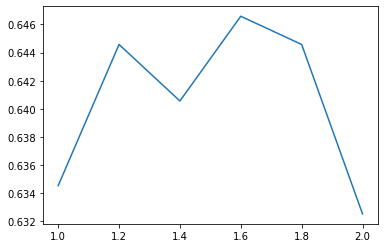

In [76]:
import matplotlib.pyplot as plt 


plt.plot(x, result)

plt.show()

In [77]:
result

[0.6345381526104418,
 0.6445783132530121,
 0.6405622489959839,
 0.6465863453815262,
 0.6445783132530121,
 0.6325301204819277]

In [26]:
censored_subjects = df2.loc[df2[9] == 1]

In [27]:
censored_subjects

,0,1,2,3,4,5,6,7,8,9
2,0,26.433679,27,158,104,68.528405,0,2.53,71.425051,1
5,1,25.633008,37,204,114,40.517454,0,3.63,11.400411,1
6,0,31.939017,21,204,123,52.829569,0,2.12,20.238193,1
8,0,34.170564,22,196,113,45.990418,0,2.47,52.829569,1
10,1,23.726421,15,253,123,66.154689,1,1.88,91.794661,1
...,...,...,...,...,...,...,...,...,...,...
492,1,26.422042,23,207,114,48.054757,1,1.07,67.318275,1
493,1,22.378743,16,254,118,58.173854,1,1.03,18.266940,1
494,0,44.826968,23,196,114,31.589322,1,2.83,36.336756,1
496,0,24.522418,29,160,97,44.761123,1,2.02,60.681725,1


In [34]:
df3=censored_subjects[range(0,8)]

In [35]:
df3

,0,1,2,3,4,5,6,7
2,0,26.433679,27,158,104,68.528405,0,2.53
5,1,25.633008,37,204,114,40.517454,0,3.63
6,0,31.939017,21,204,123,52.829569,0,2.12
8,0,34.170564,22,196,113,45.990418,0,2.47
10,1,23.726421,15,253,123,66.154689,1,1.88
...,...,...,...,...,...,...,...,...
492,1,26.422042,23,207,114,48.054757,1,1.07
493,1,22.378743,16,254,118,58.173854,1,1.03
494,0,44.826968,23,196,114,31.589322,1,2.83
496,0,24.522418,29,160,97,44.761123,1,2.02


In [41]:
def ac(valu):
    predic_s=[]
    accur=[]
    for i in range(224):
        if s[i]<=valu:
            predic_s.append(0)
        else:
            predic_s.append(1)
    for i in range(224):
        if predic_s[i]==com[i]:

            accur.append(1)
        else:

            accur.append(0)
    accur_score=sum(accur)/len(accur)
    return accur_score

In [42]:
accur

NameError: name 'accur' is not defined

In [38]:
#conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[df2.loc[c.name, 'al_evt_xd ESRD or death (0/1)']]).clip_upper(1))

In [62]:
subject=13

<AxesSubplot:>

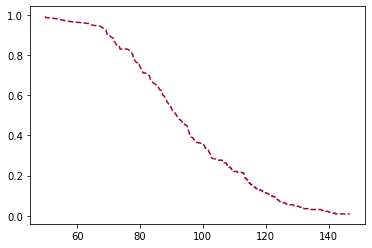

In [92]:
unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned")  
#conditioned_sf[subject].plot(color="#A60628", label="conditioned on $T>58$")

In [93]:
#co_sf=cph2.predict_survival_function('uncensored_subjects')

In [94]:
uncen_s=cph2.predict_survival_function(uncensored_subjects)

<AxesSubplot:>

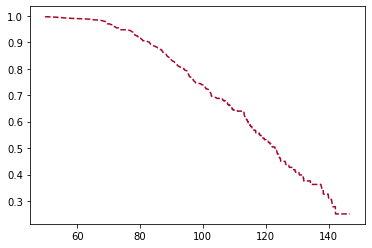

In [95]:
uncen_s[15].plot(ls="--", color="#A60628", label="unconditioned")  